TEST SIR

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cpyment import CModel

In [3]:
# First, define the model
model = CModel('SIR')

beta = 3
gamma = 1

# Now add the couplings
model.set_coupling_rate('S*I:S=>I', beta, name='beta')  # Infection rate
model.set_coupling_rate('I:I=>R', gamma, name='gamma')  # Recovery rate

In [4]:
# Let's see the dynamics from a starting state
I0 = 0.02               # Initial fraction of infected
y0 = [1-I0, I0, 0]

t = np.linspace(0, 10, 1000)  # Time axis

trajectory = model.integrate(t, y0)

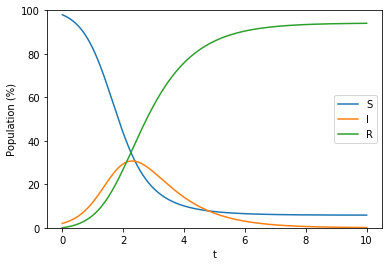

In [5]:
fig, ax = plt.subplots()

ax.set_xlabel('t')
ax.set_ylabel('Population (%)')
ax.set_ylim(0, 100)

for i, l in enumerate('SIR'):
    ax.plot(t, trajectory[:,i]*100, label=l)
    
ax.legend()

In [5]:
fmodel = CModel.make_SIR()

btarg = 4.5
gtarg = 2.1
tmodel = CModel.make_SIR(btarg, gtarg)

In [6]:
# Generate some random data
N = 1000
t = np.linspace(0, 3, N)
y0targ = [0.9, 0.1, 0]

traj = tmodel.integrate(t, y0targ)

# Extract some data from the early part of the curves
data_i = np.random.choice(range(int(N/2)), size=30, replace=False)
data_x = t[data_i]
data_y = traj[data_i] + (np.random.random((len(data_x), 3))-0.5)*0.1 # Data made artificially noisy

data = np.concatenate([data_x[:,None], data_y], axis=1)

In [7]:
# Now fit

sol = fmodel.fit(data)

fittraj = fmodel.integrate(t, sol.y0)

In [8]:

print('Target parameters:')
print('  beta = {0}'.format(btarg))
print('  gamma = {0}'.format(gtarg))
print('  y0 = {0}'.format(y0targ))

print('Fitted parameters:')
print('  beta = {0}'.format(sol.C['beta']))
print('  gamma = {0}'.format(sol.C['gamma']))
print('  y0 = {0}'.format(sol.y0))

print('Fitting quality:')
print('  R2 = {0}'.format(sol.R2))
print('  RMSRE = {0}'.format(sol.RMSRE))

Target parameters:
  beta = 4.5
  gamma = 2.1
  y0 = [0.9, 0.1, 0]
Fitted parameters:
  beta = 4.36238841800057
  gamma = 2.1601186819430582
  y0 = [ 0.90418577  0.11007017 -0.00572364]
Fitting quality:
  R2 = [0.97265289 0.64984134 0.99835746]
  RMSRE = 1.0053354062748574


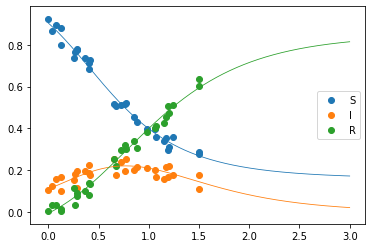

In [10]:
fig, ax = plt.subplots()

for i in range(3):
    ax.scatter(data[:,0], data[:,i+1], label='SIR'[i])
    ax.plot(t, fittraj[:,i], lw=0.8)
    
ax.legend()